In [118]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
from matplotlib_venn import venn2, venn3

# Load in data 
qPCR = pd.read_csv('qPCR_Data.csv')
WD3 = pd.read_csv('Whiskerd3_Zscore.csv')

trans_gene_list = ['ActB','Clcn1','Gadd45a','Kcnj2']

#Select subset of data frame for further analysis
qPCR = pd.concat([qPCR.iloc[:,2], qPCR.iloc[:,4], qPCR.iloc[:,5], qPCR.iloc[:,6], qPCR.iloc[:,11]], axis = 1, sort = False)

#Trim WD3 and filter
WD3 = WD3.iloc[:,0:2]
WD3 = WD3.loc[WD3['Gene name'].isin(trans_gene_list)].reset_index(drop=True)

#Define zscore inline function
zscore = lambda x: (x - x.mean()) / x.std()

#Zscore normalized delta CT, grouping by target and day and add onto dataframe
qPCR['Zscore'] = qPCR.groupby(['Target.Name','Day'])['delCt'].transform(zscore)
#Isolate Day 3 and right side zscores
qPCR = qPCR.loc[(qPCR['Day'] == 3) & (qPCR['Side'] == 'R')].reset_index(drop=True)
#Average isolated zscores
qMean = qPCR.groupby('Target.Name')['Zscore'].mean()
qMean = qMean.iloc[1:4].reset_index(drop=True)

#qMean = pd.merge(WD3, qMean, left_on = "Gene name", right_on = "Target.Name", how = "inner")
qMean = pd.concat([WD3,qMean], axis = 1).reset_index(drop=True)
qMean = qMean.rename(columns = {'WD3':'RNA-seq zscore', 'Gene name':'Transcript gene name', 'Zscore':'qPCR zscore'})
qMean = qMean.reindex(columns = ['RNA-seq zscore','qPCR zscore','Transcript gene name'])

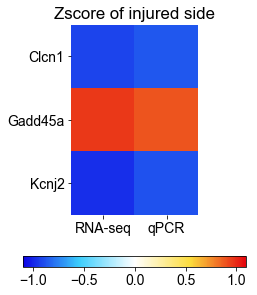

In [130]:
#Isolate data into numpy matrix
Z = qMean.iloc[:,0:2].values

#Create y-labels
ylabels = qMean["Transcript gene name"].values

#Plot Data
# Declare parameters
color = ['#0d02e5','#3ccdfc','#ffffff','#fcdc3c','#e5020d']
fig, ax = plt.subplots()
plt.rcParams['font.family'] = "Arial"
plt.rcParams.update({'font.size': 14})
plt.rcParams['savefig.bbox'] = 'tight'

# Create the colormap
cm = colors.LinearSegmentedColormap.from_list('my_list', color, N=256)

#Define bounds to colormap
bounds = np.arange(-1.1,1.1,0.001)
norm = colors.BoundaryNorm(bounds,cm.N)

# Apply colormap to data
im = ax.imshow(Z, origin='upper', cmap=cm, interpolation = "nearest", norm=norm, aspect='equal')
cb = fig.colorbar(im, ax=ax, cmap=cm, norm=norm, boundaries=bounds, orientation="horizontal")
cb.set_ticks([-1,-0.5,0,0.5,1],update_ticks=True)
ax.set_yticks(np.arange(0, len(Z), 1))
ax.set_xticks([0,1])
ax.set_xticklabels(("RNA-seq","qPCR"))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticklabels(ylabels)
ax.set_title('Zscore of injured side')
fig_name = 'RNA-seq validation' + ".svg"

fig.set_size_inches(4,5)

plt.savefig(fig_name)


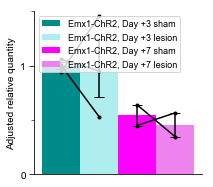

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(2)
minor_locatorx = AutoMinorLocator(2) #Need to declare a unique MinorLocator object for each Y-axis


plt.rcParams['font.family'] = "Arial"
plt.rcParams.update({'font.size': 10})
plt.rcParams['savefig.bbox'] = 'tight'


Data = pd.read_csv('COP4_qPCR.csv')

Average = Data.mean()
Error = Data.sem()

ind = 1  # the x locations for the groups
width = 0.3       # the width of the bars
ind = ind*1.5
fig, ax = plt.subplots()
color_vector = ['darkcyan','paleturquoise','fuchsia','violet']
rects = [0]*4 #Pre-alocate list
for x in range(0, 4):
    rects[x] = ax.bar(ind + (width * x), Average[x], width, color=color_vector[x], yerr=Error[x], capsize=5)

x1 = np.array([(ind + (width * 0)), (ind + (width * 1))])
x2 = np.array([(ind + (width * 2)), (ind + (width * 3))])
data = Data.values

for y in range(0,3):
    ax.plot(x1,data[y,0:2],'k.-')
    
for y in range(0,2):
    ax.plot(x2,data[y,2:4],'k.-')


# add some text for labels, title and axes ticks
ax.set_ylabel('Adjusted relative quantity')
ax.set_yticks([0,1])
ax.set_xticks([])
ax.set_ylim(0,1.5)
ax.yaxis.set_minor_locator(minor_locator)
plt.tick_params(which='major', length=5)
plt.tick_params(which='minor', length=3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig = plt.gcf()
fig.set_size_inches(3,3)
ax.legend((rects[0], rects[1], rects[2], rects[3]), ('Emx1-ChR2, Day +3 sham', 'Emx1-ChR2, Day +3 lesion','Emx1-ChR2, Day +7 sham','Emx1-ChR2, Day +7 lesion'),fontsize = 9, loc = 'upper left')
plt.savefig('COP4.svg')
plt.show()




In [15]:
print(Data.values)

[[1.00368016 0.53094681 0.44864503 0.56507193]
 [1.05787889 0.95148879 0.63934426 0.34626966]
 [0.93844095 1.45433255        nan        nan]]
